# 前期配置

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import missingno as msno
import seaborn as sns

%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"  # 一个cell显示多输出

pd.set_option('display.max_rows', 100)  # 设置最大显示100行
pd.set_option('display.max_columns', 100)  # 设置最大显示100列

# 查看数据

In [2]:
finance = pd.read_csv("./train.csv")
finance.head(15) # 查看前15组数据了解特征数，并对数据的特征有个初步的猜测

,id_num,program_type,program_id,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass
0,9389_150,Y,Y_1,136.0,150.0,offline,intermediate,9389.0,M,Matriculation,3.0,24.0,5.0,N,1.0,0
1,16523_44,T,T_1,131.0,44.0,offline,easy,16523.0,F,High School Diploma,4.0,26.0,2.0,N,3.0,1
2,13987_178,Z,Z_2,120.0,178.0,online,easy,13987.0,M,Matriculation,1.0,40.0,1.0,N,2.0,1
3,13158_32,T,T_2,117.0,32.0,offline,easy,13158.0,F,Matriculation,3.0,NaN,4.0,N,1.0,1
4,10591_84,V,V_3,131.0,84.0,offline,intermediate,10591.0,F,High School Diploma,1.0,42.0,2.0,N,4.0,1
5,12531_23,T,T_3,134.0,23.0,offline,intermediate,12531.0,F,High School Diploma,1.0,29.0,4.0,N,2.0,0
6,17874_144,Y,Y_2,120.0,144.0,online,easy,17874.0,M,Bachelors,2.0,48.0,3.0,N,3.0,1
7,8129_61,U,U_1,134.0,NaN,online,easy,8129.0,M,Matriculation,2.0,45.0,1.0,N,1.0,1
8,5652_57,U,U_1,134.0,57.0,offline,easy,5652.0,M,Matriculation,4.0,NaN,3.0,N,3.0,1
9,17019_153,Y,Y_1,136.0,153.0,offline,hard,17019.0,M,Bachelors,3.0,28.0,2.0,N,4.0,1


In [3]:
finance.describe()
finance.info()

,program_duration,test_id,trainee_id,city_tier,age,total_programs_enrolled,trainee_engagement_rating,is_pass
count,49323.000000,49273.000000,49259.000000,49298.000000,30619.000000,49306.000000,49226.000000,49998.000000
mean,128.229366,91.414345,9863.493128,2.249097,36.514256,2.583114,2.397818,0.696288
std,6.889967,51.307852,5716.490640,1.010896,9.045487,1.239399,1.326378,0.459864
min,117.000000,0.000000,1.000000,1.000000,17.000000,1.000000,1.000000,0.000000
25%,121.000000,45.000000,5051.500000,1.000000,28.000000,2.000000,1.000000,0.000000
50%,131.000000,91.000000,9665.000000,2.000000,40.000000,2.000000,2.000000,1.000000
75%,134.000000,135.000000,14618.000000,3.000000,45.000000,3.000000,4.000000,1.000000
max,136.000000,187.000000,20097.000000,4.000000,63.000000,14.000000,5.000000,1.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49998 entries, 0 to 49997
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id_num                     49998 non-null  object 
 1   program_type               49267 non-null  object 
 2   program_id                 49299 non-null  object 
 3   program_duration           49323 non-null  float64
 4   test_id                    49273 non-null  float64
 5   test_type                  49296 non-null  object 
 6   difficulty_level           49295 non-null  object 
 7   trainee_id                 49259 non-null  float64
 8   gender                     49291 non-null  object 
 9   education                  49296 non-null  object 
 10  city_tier                  49298 non-null  float64
 11  age                        30619 non-null  float64
 12  total_programs_enrolled    49306 non-null  float64
 13  is_handicapped             49280 non-null  obj

<AxesSubplot:>

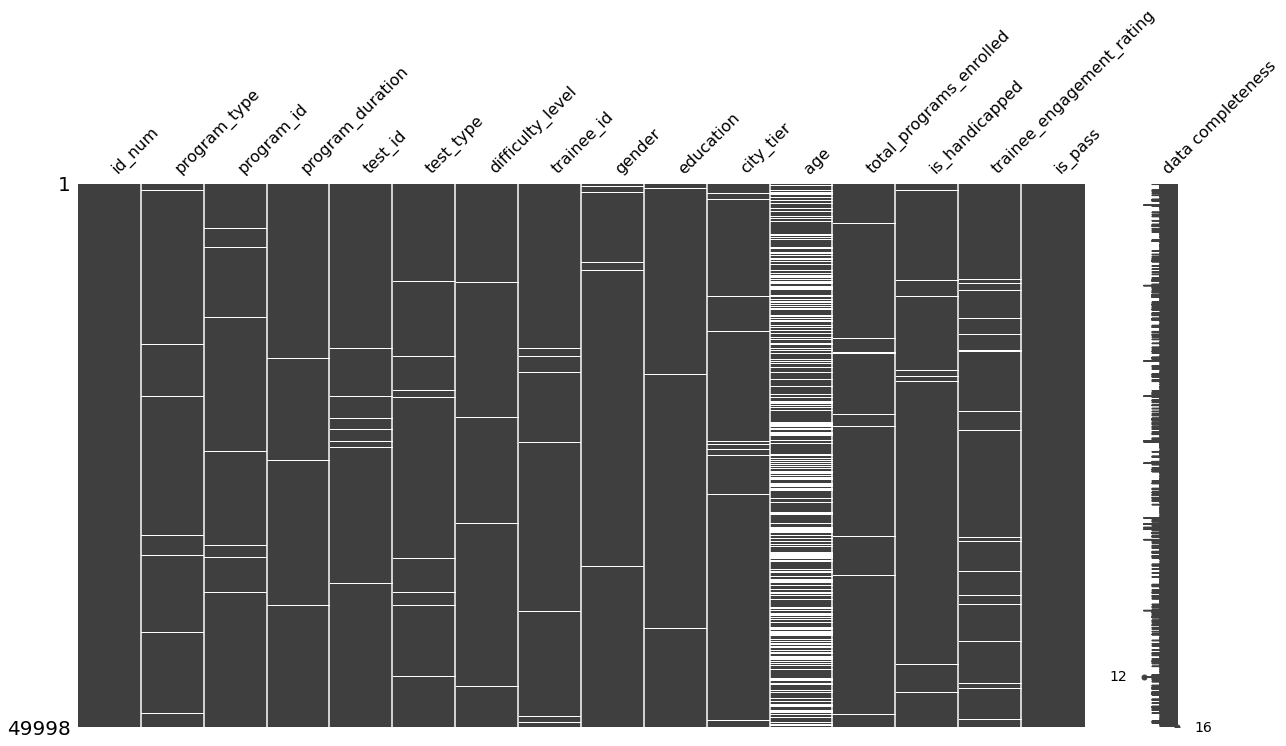

In [4]:
msno.matrix(finance, figsize = (20, 10), labels=True) # 数据缺失查看

<AxesSubplot:>

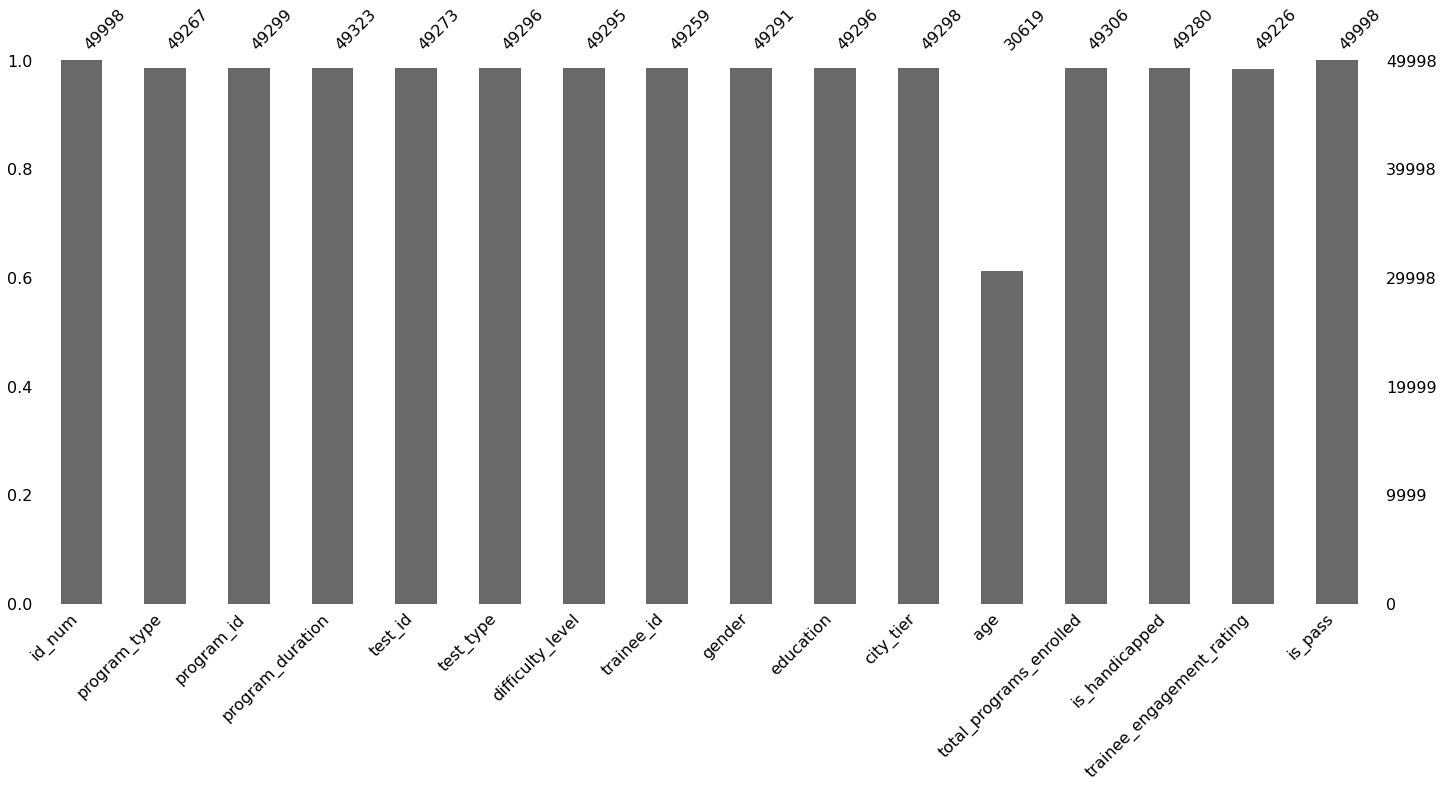

In [5]:
msno.bar(finance)

# 数据预处理

,program_duration,test_id,trainee_id,city_tier,age,total_programs_enrolled,trainee_engagement_rating,is_pass
count,25427.000000,25427.000000,25427.000000,25427.000000,25427.000000,25427.000000,25427.000000,25427.000000
mean,128.308412,89.098478,10211.146144,2.235930,36.540449,2.519487,2.370433,0.696464
std,6.825941,52.085464,5914.145143,1.004349,9.037045,1.215236,1.333335,0.459793
min,117.000000,0.000000,1.000000,1.000000,17.000000,1.000000,1.000000,0.000000
25%,121.000000,43.000000,5135.500000,1.000000,28.000000,2.000000,1.000000,0.000000
50%,131.000000,87.000000,10091.000000,2.000000,40.000000,2.000000,2.000000,1.000000
75%,134.000000,133.000000,15387.000000,3.000000,45.000000,3.000000,4.000000,1.000000
max,136.000000,187.000000,20097.000000,4.000000,63.000000,14.000000,5.000000,1.000000


<class 'pandas.core.frame.DataFrame'>
Int64Index: 25427 entries, 0 to 49995
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id_num                     25427 non-null  object 
 1   program_type               25427 non-null  object 
 2   program_id                 25427 non-null  object 
 3   program_duration           25427 non-null  float64
 4   test_id                    25427 non-null  float64
 5   test_type                  25427 non-null  object 
 6   difficulty_level           25427 non-null  object 
 7   trainee_id                 25427 non-null  float64
 8   gender                     25427 non-null  object 
 9   education                  25427 non-null  object 
 10  city_tier                  25427 non-null  float64
 11  age                        25427 non-null  float64
 12  total_programs_enrolled    25427 non-null  float64
 13  is_handicapped             25427 non-null  obj

<AxesSubplot:>

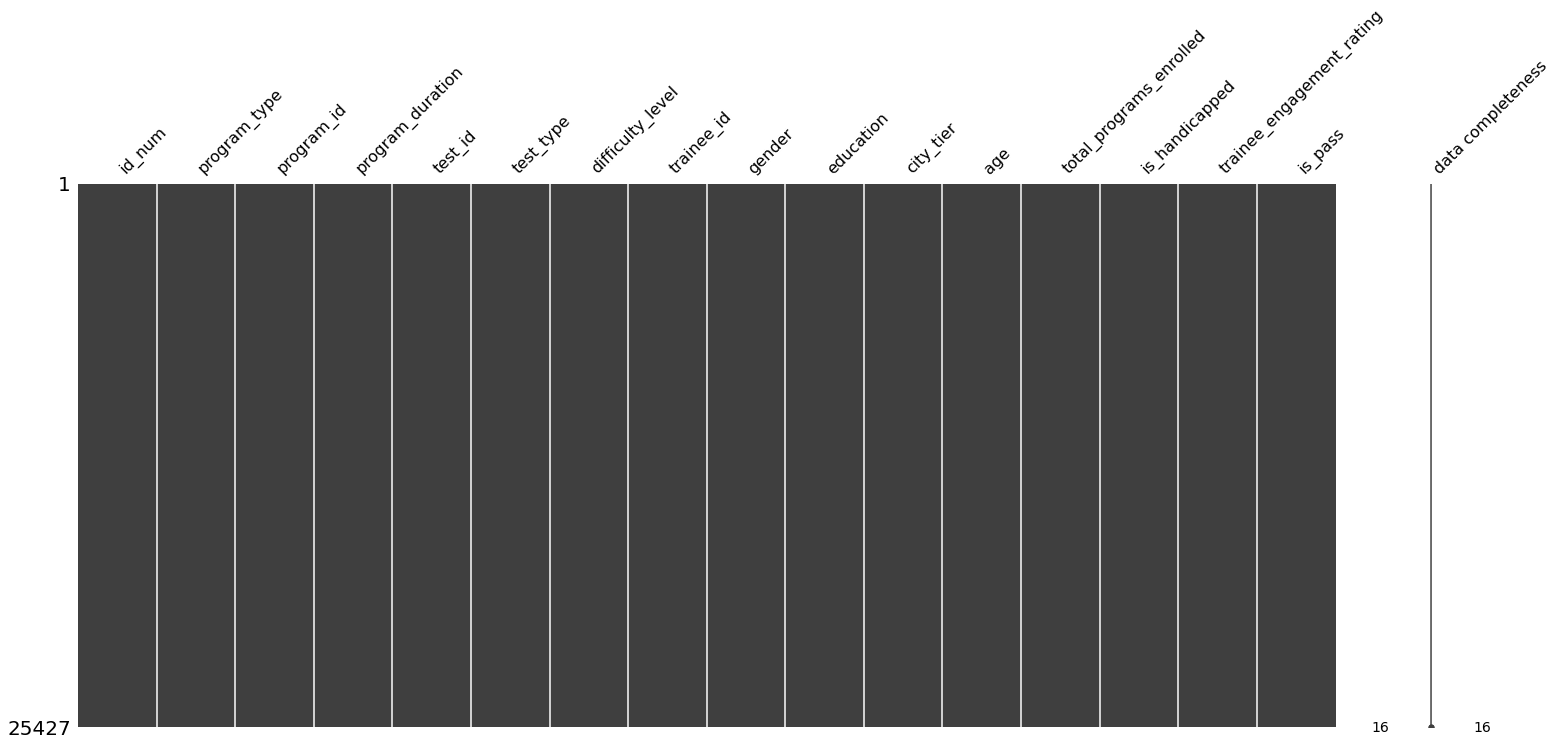

In [6]:
# 由上面查看数据观察得知，数据有缺失，其中年龄缺失最多，我们先补全数字数据
# 年龄数据丢失占比接近50%使用平均数补充不是一个特别好的方法,选择删除含有空值的数据
finance= finance.dropna(axis=0, how='any') 

# 数据丢失特别少的对平均数四舍五入，填充进缺失，数据整体影响小

# finance['program_duration'] = finance['program_duration'].fillna(128.0) 
# finance['city_tier'] = finance['city_tier'].fillna(2.0)
# finance['test_id'] = finance['test_id'].fillna(91.0)
# finance['total_programs_enrolled'] = finance['total_programs_enrolled'].fillna(3.0)
# finance['trainee_engagement_rating'] = finance['trainee_engagement_rating'].fillna(2.0)
# finance['trainee_id'] = finance['trainee_id'].fillna(9864)

finance.describe()
finance.info()
msno.matrix(finance, labels=True)

In [7]:
# 性别、项目类型、考试难度等编码
print(finance['gender'].unique()) # 查看gender特征有哪些值

# finance['gender'] = finance['gender'].fillna('M') # 缺失数据少，默认为男性填补
finance['gender'] = pd.get_dummies(finance['gender']) #使用pandas库中的get_dummies函数进行独热编码
# finance.loc[finance['gender'] == 'M']  # 原本想和继元师兄一样的，发现可以调库

print(finance['gender'].unique()) # 查看编码后的特征值

['M' 'F']
[0 1]


In [8]:
# 调模型时发现项目类型特征类别太多，影响模拟，所以舍去了这一特征。

print(finance['program_type'].unique()) # 查看项目类型特征有哪些值

# finance['program_type'] = finance['program_type'].fillna('Y') #Y数量多，我们用Y补充缺失数据
finance['program_type'] = pd.get_dummies(finance['program_type'])

# print(finance['program_type'].unique()) # 独热编码后的特征值

['Y' 'T' 'Z' 'V' 'X' 'U' 'S']


In [9]:
print(finance['is_handicapped'].unique())

# finance['is_handicapped'] = finance['is_handicapped'].fillna('N')
finance['is_handicapped'] = pd.get_dummies(finance['is_handicapped'])

# print(finance['is_handicapped'].unique())

['N' 'Y']


In [10]:
print(finance['difficulty_level'].unique())

# 同理观察数据发现'easy'数量多我们使用easy填充
# finance['difficulty_level'] = finance['difficulty_level'].fillna("easy")

# 注意到考试难度等级是有排序的，故舍弃独热编码， 选择标签编码
# finance['difficulty_level'] = pd.get_dummies(finance['difficulty_level']) 

finance.loc[finance["difficulty_level"] == "easy", "difficulty_level"] = 0
finance.loc[finance["difficulty_level"] == "intermediate", "difficulty_level"] = 1
finance.loc[finance["difficulty_level"] == "hard", "difficulty_level"] = 2
finance.loc[finance["difficulty_level"] == "vary hard", "difficulty_level"] = 3

print(finance['difficulty_level'].unique())

['intermediate' 'easy' 'hard' 'vary hard']
[1 0 2 3]


In [11]:
# 考试类型数据填充与编码

print(finance['test_type'].unique())
finance['test_type'] = finance['test_type'].fillna("offline")
finance['test_type'] = pd.get_dummies(finance['test_type'])

print(finance['test_type'].unique())

['offline' 'online']
[1 0]


In [12]:
# 受教育程度数据填充与编码

print(finance['education'].unique())
# finance['education'] = finance['education'].fillna("High School Diploma")
# finance['education'] = pd.get_dummies(finance['education'])

#独热编码后发现，受教育程度也是有排序的，改为标签编码

finance.loc[finance['education'] == 'No Qualification', "education"] = 0
finance.loc[finance['education'] == 'High School Diploma', "education"] = 1
finance.loc[finance['education'] == 'Matriculation', "education"] = 2
finance.loc[finance['education'] == 'Bachelors', "education"] = 3
finance.loc[finance['education'] == 'Masters', "education"] = 4

finance.info() # 查看编码后的数据

['Matriculation' 'High School Diploma' 'Bachelors' 'No Qualification'
 'Masters']
<class 'pandas.core.frame.DataFrame'>
Int64Index: 25427 entries, 0 to 49995
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id_num                     25427 non-null  object 
 1   program_type               25427 non-null  uint8  
 2   program_id                 25427 non-null  object 
 3   program_duration           25427 non-null  float64
 4   test_id                    25427 non-null  float64
 5   test_type                  25427 non-null  uint8  
 6   difficulty_level           25427 non-null  object 
 7   trainee_id                 25427 non-null  float64
 8   gender                     25427 non-null  uint8  
 9   education                  25427 non-null  object 
 10  city_tier                  25427 non-null  float64
 11  age                        25427 non-null  float64
 12  total_programs_enrol

# 线性回归模型

In [13]:
from sklearn.linear_model import LinearRegression # 导入线性回归的类
from sklearn.model_selection import KFold # K折交叉验证，取平均调参

# 输入机器学习算法特征
predictors = [ "trainee_engagement_rating", "test_type", "difficulty_level",  "city_tier", "test_id"]

alg = LinearRegression() #初始化线性回归
kf = KFold(n_splits=5, shuffle=True, random_state=1) # KFold实例化
# kf.get_n_splits(finance)

predictions = []

for train, test in kf.split(finance):
    train_predictors = (finance[predictors].iloc[train,:]) # 取出训练集
    train_target = finance["is_pass"].iloc[train] # 获取数据集中交叉分类好的标签，即是否通过
    alg.fit(train_predictors, train_target) # 训练模型
    test_predictions = alg.predict(finance[predictors].iloc[test,:]) # 检验模型误差
    predictions.append(test_predictions)

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

In [14]:
predictions = np.concatenate(predictions, axis=0)

predictions[predictions > 0.5] = 1
predictions[predictions <= 0.5] = 0

print("测试数据的总数量：", len(predictions))
print("正确的数量：", sum(predictions == finance["is_pass"]))
accuracy = sum(predictions == finance["is_pass"]) / len(predictions)
print("准确率为：", accuracy)

测试数据的总数量： 25427
正确的数量： 17382
准确率为： 0.6836040429464743


# 逻辑回归模型

In [15]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression

alg = LogisticRegression(random_state=1, solver='liblinear') # 初始化逻辑回归

# 逻辑回归交叉验证
score = model_selection.cross_val_score(alg, finance[predictors], finance["is_pass"], cv=3)
print("准确率为：", score.mean())

准确率为： 0.7032681043311371


# 建立特征工程

In [16]:
finance
finance.describe()

,id_num,program_type,program_id,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass
0,9389_150,0,Y_1,136.0,150.0,1,1,9389.0,0,2,3.0,24.0,5.0,1,1.0,0
1,16523_44,0,T_1,131.0,44.0,1,0,16523.0,1,1,4.0,26.0,2.0,1,3.0,1
2,13987_178,0,Z_2,120.0,178.0,0,0,13987.0,0,2,1.0,40.0,1.0,1,2.0,1
4,10591_84,0,V_3,131.0,84.0,1,1,10591.0,1,1,1.0,42.0,2.0,1,4.0,1
5,12531_23,0,T_3,134.0,23.0,1,1,12531.0,1,1,1.0,29.0,4.0,1,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49989,6155_17,0,T_4,120.0,17.0,0,0,6155.0,1,2,4.0,24.0,4.0,0,1.0,1
49990,17107_180,0,Z_1,136.0,180.0,1,0,17107.0,1,1,2.0,45.0,1.0,1,2.0,1
49991,13936_61,0,U_1,134.0,61.0,0,0,13936.0,0,3,4.0,26.0,3.0,1,1.0,0
49992,12375_173,0,Z_2,120.0,173.0,0,0,12375.0,1,2,4.0,26.0,1.0,1,1.0,1


,program_type,program_duration,test_id,test_type,trainee_id,gender,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass
count,25427.000000,25427.000000,25427.000000,25427.000000,25427.000000,25427.000000,25427.000000,25427.000000,25427.000000,25427.000000,25427.000000,25427.000000
mean,0.023322,128.308412,89.098478,0.615448,10211.146144,0.487041,2.235930,36.540449,2.519487,0.915366,2.370433,0.696464
std,0.150926,6.825941,52.085464,0.486499,5914.145143,0.499842,1.004349,9.037045,1.215236,0.278342,1.333335,0.459793
min,0.000000,117.000000,0.000000,0.000000,1.000000,0.000000,1.000000,17.000000,1.000000,0.000000,1.000000,0.000000
25%,0.000000,121.000000,43.000000,0.000000,5135.500000,0.000000,1.000000,28.000000,2.000000,1.000000,1.000000,0.000000
50%,0.000000,131.000000,87.000000,1.000000,10091.000000,0.000000,2.000000,40.000000,2.000000,1.000000,2.000000,1.000000
75%,0.000000,134.000000,133.000000,1.000000,15387.000000,1.000000,3.000000,45.000000,3.000000,1.000000,4.000000,1.000000
max,1.000000,136.000000,187.000000,1.000000,20097.000000,1.000000,4.000000,63.000000,14.000000,1.000000,5.000000,1.000000


SelectKBest(k=6)

<BarContainer object of 13 artists>

([<matplotlib.axis.XTick at 0x229270f59d0>,
 [Text(0, 0, 'difficulty_level'),
  Text(1, 0, 'gender'),
  Text(2, 0, 'age'),
  Text(3, 0, 'program_duration'),
  Text(4, 0, 'test_id'),
  Text(5, 0, 'program_type'),
  Text(6, 0, 'city_tier'),
  Text(7, 0, 'total_programs_enrolled'),
  Text(8, 0, 'trainee_engagement_rating'),
  Text(9, 0, 'test_type'),
  Text(10, 0, 'education'),
  Text(11, 0, 'trainee_id'),
  Text(12, 0, 'is_handicapped')])

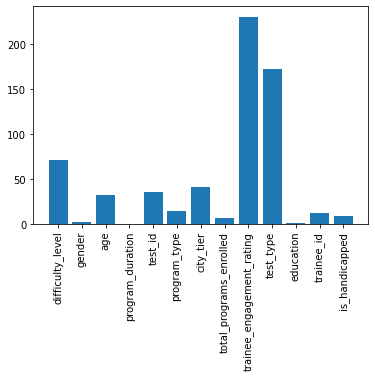

In [17]:
from sklearn.feature_selection import SelectKBest, f_classif # 特征选择库

predictors = [ "difficulty_level", "gender", "age", "program_duration", "test_id","program_type",
              "city_tier", "total_programs_enrolled", "trainee_engagement_rating", 
              "test_type", "education", "trainee_id", "is_handicapped"]

selector = SelectKBest(f_classif, k=6) # f_classif：基于方差分析的检验统计f值，根据k个最高分数选择功能
selector.fit(finance[predictors], finance["is_pass"])

scores = -np.log10(selector.pvalues_)

# 打印出特征方差直方图
plt.bar(range(len(predictors)), scores)
plt.xticks(range(len(predictors)), predictors, rotation='vertical')
plt.show()

# 通过直方图选择特征最大的5个
# 试过把"age"特征加入，但是拟合效果反而下降了，故舍去了
predictors = ["trainee_engagement_rating", "test_type", "difficulty_level","city_tier", "test_id"]

In [18]:
from sklearn.ensemble import RandomForestClassifier # 加载随机森林模型类

alg = RandomForestClassifier(random_state=1,n_estimators=400, min_samples_split=400, min_samples_leaf=10)
kf = model_selection.KFold(n_splits=5, shuffle=True, random_state=1)
scores = model_selection.cross_val_score(alg, finance[predictors], finance["is_pass"], cv=kf)
print("随机森林模型的准确率："+ str(scores.mean()))

随机森林模型的准确率：0.7177411530524536


In [19]:
# from sklearn import svm

# predictions = []

# alg = svm.SVC(kernel="linear")
# kf = model_selection.KFold(n_splits=5, shuffle=True, random_state=1)

# for train, test in kf.split(finance):
#     train_predictors = (finance[predictors].iloc[train,:]) # 取出训练集
#     train_target = finance["is_pass"].iloc[train] # 获取数据集中交叉分类好的标签，即是否通过
#     alg.fit(train_predictors, train_target) # 训练模型
#     test_predictions = alg.predict(finance[predictors].iloc[test,:]) # 检验模型误差
#     predictions.append(test_predictions)
    
# score = model_selection.cross_val_score(alg, finance[predictors], finance["is_pass"], cv=kf)
# print("支持向量机模型准确率为：", score.mean())

# 集成多个分类器

In [20]:
from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.ensemble import BaggingClassifier

# 调节分类器参数

algorithms = [
    [GradientBoostingClassifier(random_state=1,learning_rate=0.01, subsample=0.82, n_estimators=400, max_depth=6), [
         "trainee_engagement_rating", "test_type", "difficulty_level",  "city_tier", "test_id"]],
    
    [RandomForestClassifier(random_state=1, n_estimators=400, min_samples_split=400, 
                            min_samples_leaf=15), [
        "trainee_engagement_rating", "test_type", "difficulty_level",  "city_tier", "test_id"]]
]

kf = KFold(n_splits=5, shuffle=True, random_state=1)

predictions = []

for train, test in kf.split(finance):
    train_target = finance["is_pass"].iloc[train]
    full_test_predictions = []
    
    for alg, predictors in algorithms:
        alg.fit(finance[predictors].iloc[train,:], train_target)
        test_predictions = alg.predict_proba(finance[predictors].iloc[test,:].astype(float))[:,1]
        full_test_predictions.append(test_predictions)
        
    test_predictions = (full_test_predictions[0] + full_test_predictions[1] ) / 2
    
    test_predictions[test_predictions < 0.5] = 0
    test_predictions[test_predictions >= 0.5] = 1
    predictions.append(test_predictions)
    
predictions = np.concatenate(predictions, axis=0)

accuracy = sum(predictions == finance["is_pass"]) / len(predictions)
print(accuracy)

GradientBoostingClassifier(learning_rate=0.01, max_depth=6, n_estimators=400,
                           random_state=1, subsample=0.82)

RandomForestClassifier(min_samples_leaf=15, min_samples_split=400,
                       n_estimators=400, random_state=1)

GradientBoostingClassifier(learning_rate=0.01, max_depth=6, n_estimators=400,
                           random_state=1, subsample=0.82)

RandomForestClassifier(min_samples_leaf=15, min_samples_split=400,
                       n_estimators=400, random_state=1)

GradientBoostingClassifier(learning_rate=0.01, max_depth=6, n_estimators=400,
                           random_state=1, subsample=0.82)

RandomForestClassifier(min_samples_leaf=15, min_samples_split=400,
                       n_estimators=400, random_state=1)

GradientBoostingClassifier(learning_rate=0.01, max_depth=6, n_estimators=400,
                           random_state=1, subsample=0.82)

RandomForestClassifier(min_samples_leaf=15, min_samples_split=400,
                       n_estimators=400, random_state=1)

GradientBoostingClassifier(learning_rate=0.01, max_depth=6, n_estimators=400,
                           random_state=1, subsample=0.82)

RandomForestClassifier(min_samples_leaf=15, min_samples_split=400,
                       n_estimators=400, random_state=1)

0.6430565933849844


# 导入测试集

,program_duration,test_id,trainee_id,city_tier,age,total_programs_enrolled,trainee_engagement_rating,is_pass
count,11465.000000,11465.000000,11465.000000,11465.000000,7068.000000,11465.000000,11451.000000,0.0
mean,128.179067,90.116616,9801.775142,2.232708,36.352292,2.581771,2.382150,NaN
std,6.890919,51.172182,5658.995423,1.012618,8.993219,1.229564,1.314206,NaN
min,117.000000,0.000000,1.000000,1.000000,17.000000,1.000000,1.000000,NaN
25%,121.000000,44.000000,5054.000000,1.000000,28.000000,2.000000,1.000000,NaN
50%,131.000000,89.000000,9580.000000,2.000000,39.000000,2.000000,2.000000,NaN
75%,134.000000,134.000000,14429.000000,3.000000,45.000000,3.000000,3.000000,NaN
max,136.000000,187.000000,20096.000000,4.000000,59.000000,12.000000,5.000000,NaN


<AxesSubplot:>

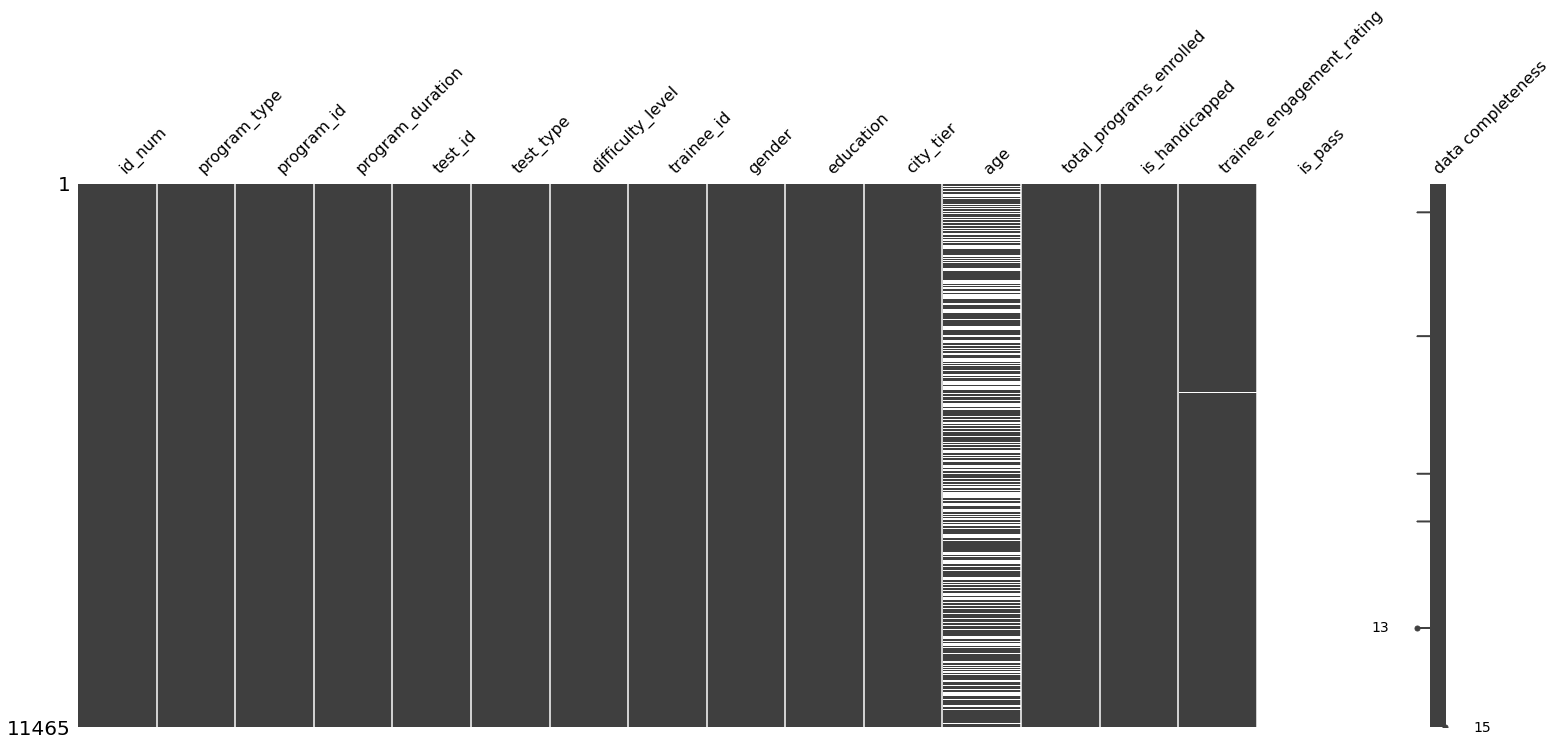

In [21]:
test_2 = pd.read_csv("./test2.csv")

test_2.describe()
msno.matrix(test_2, labels=True) # 查看数据缺失


In [22]:
# 对测试集数据集补充与编码

test_2['age'] = test_2['age'].fillna(39) #使用中位数填充
test_2["trainee_engagement_rating"] = test_2["trainee_engagement_rating"].fillna(2.0)

# test_1['city_tier'] = test_1['city_tier'].fillna(2.0)
# test_1['total_programs_enrolled'] = test_1['total_programs_enrolled'].fillna(3.0)
# test_1['trainee_engagement_rating'] = test_1['trainee_engagement_rating'].fillna(2.0)

In [23]:
# 性别
# test_1['gender'] = test_1['gender'].fillna('M') 
# test_1['gender'] = pd.get_dummies(test_1['gender']) 

# 考试难度
# test_1['difficulty_level'] = test_1['difficulty_level'].fillna("easy")

test_2.loc[test_2["difficulty_level"] == "easy", "difficulty_level"] = 0
test_2.loc[test_2["difficulty_level"] == "intermediate", "difficulty_level"] = 1
test_2.loc[test_2["difficulty_level"] == "hard", "difficulty_level"] = 2
test_2.loc[test_2["difficulty_level"] == "vary hard", "difficulty_level"] = 3

# 考试类型
# test_1['test_type'] = test_1['test_type'].fillna("offline")
test_2['test_type'] = pd.get_dummies(test_2['test_type'])

# 受教育程度
# test_1['education'] = test_1['education'].fillna("High School Diploma")
# test_1['education'] = pd.get_dummies(test_1['education'])

In [24]:
test_2.describe()

,program_duration,test_id,test_type,trainee_id,city_tier,age,total_programs_enrolled,trainee_engagement_rating,is_pass
count,11465.000000,11465.000000,11465.000000,11465.000000,11465.000000,11465.000000,11465.000000,11465.000000,0.0
mean,128.179067,90.116616,0.595726,9801.775142,2.232708,37.367728,2.581771,2.381683,NaN
std,6.890919,51.172182,0.490772,5658.995423,1.012618,7.177393,1.229564,1.313471,NaN
min,117.000000,0.000000,0.000000,1.000000,1.000000,17.000000,1.000000,1.000000,NaN
25%,121.000000,44.000000,0.000000,5054.000000,1.000000,30.000000,2.000000,1.000000,NaN
50%,131.000000,89.000000,1.000000,9580.000000,2.000000,39.000000,2.000000,2.000000,NaN
75%,134.000000,134.000000,1.000000,14429.000000,3.000000,43.000000,3.000000,3.000000,NaN
max,136.000000,187.000000,1.000000,20096.000000,4.000000,59.000000,12.000000,5.000000,NaN


# 对测试集进行预测

In [25]:
predictions = []
full_test_predictions = []


for alg, predictors in algorithms:
    test_predictions = alg.predict_proba(test_2[predictors].astype(float))[:,1]
    full_test_predictions.append(test_predictions)
        
test_predictions = (full_test_predictions[0] + full_test_predictions[1] ) / 2
    
test_predictions[test_predictions <= 0.5] = 0
test_predictions[test_predictions > 0.5] = 1
predictions.append(test_predictions)
    
predictions = np.concatenate(predictions, axis=0)


In [26]:
Data = pd.DataFrame(predictions)
Data.to_csv("./submission.csv", index=0, header=1)